In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [16]:
bank = pd.read_csv("C:\Aalesh and Mandar\Datasets\Cases\Bankruptcy\Bankruptcy.csv")

In [17]:
bank.head()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


In [18]:
x = bank.drop(["D","YR","NO"], axis=1)
y = bank["D"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2022, test_size = 0.3)

In [20]:
dtc = DecisionTreeClassifier( random_state = 2022, max_depth = 4)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
y_pred_prob = dtc.predict_proba(x_test)[:,1]

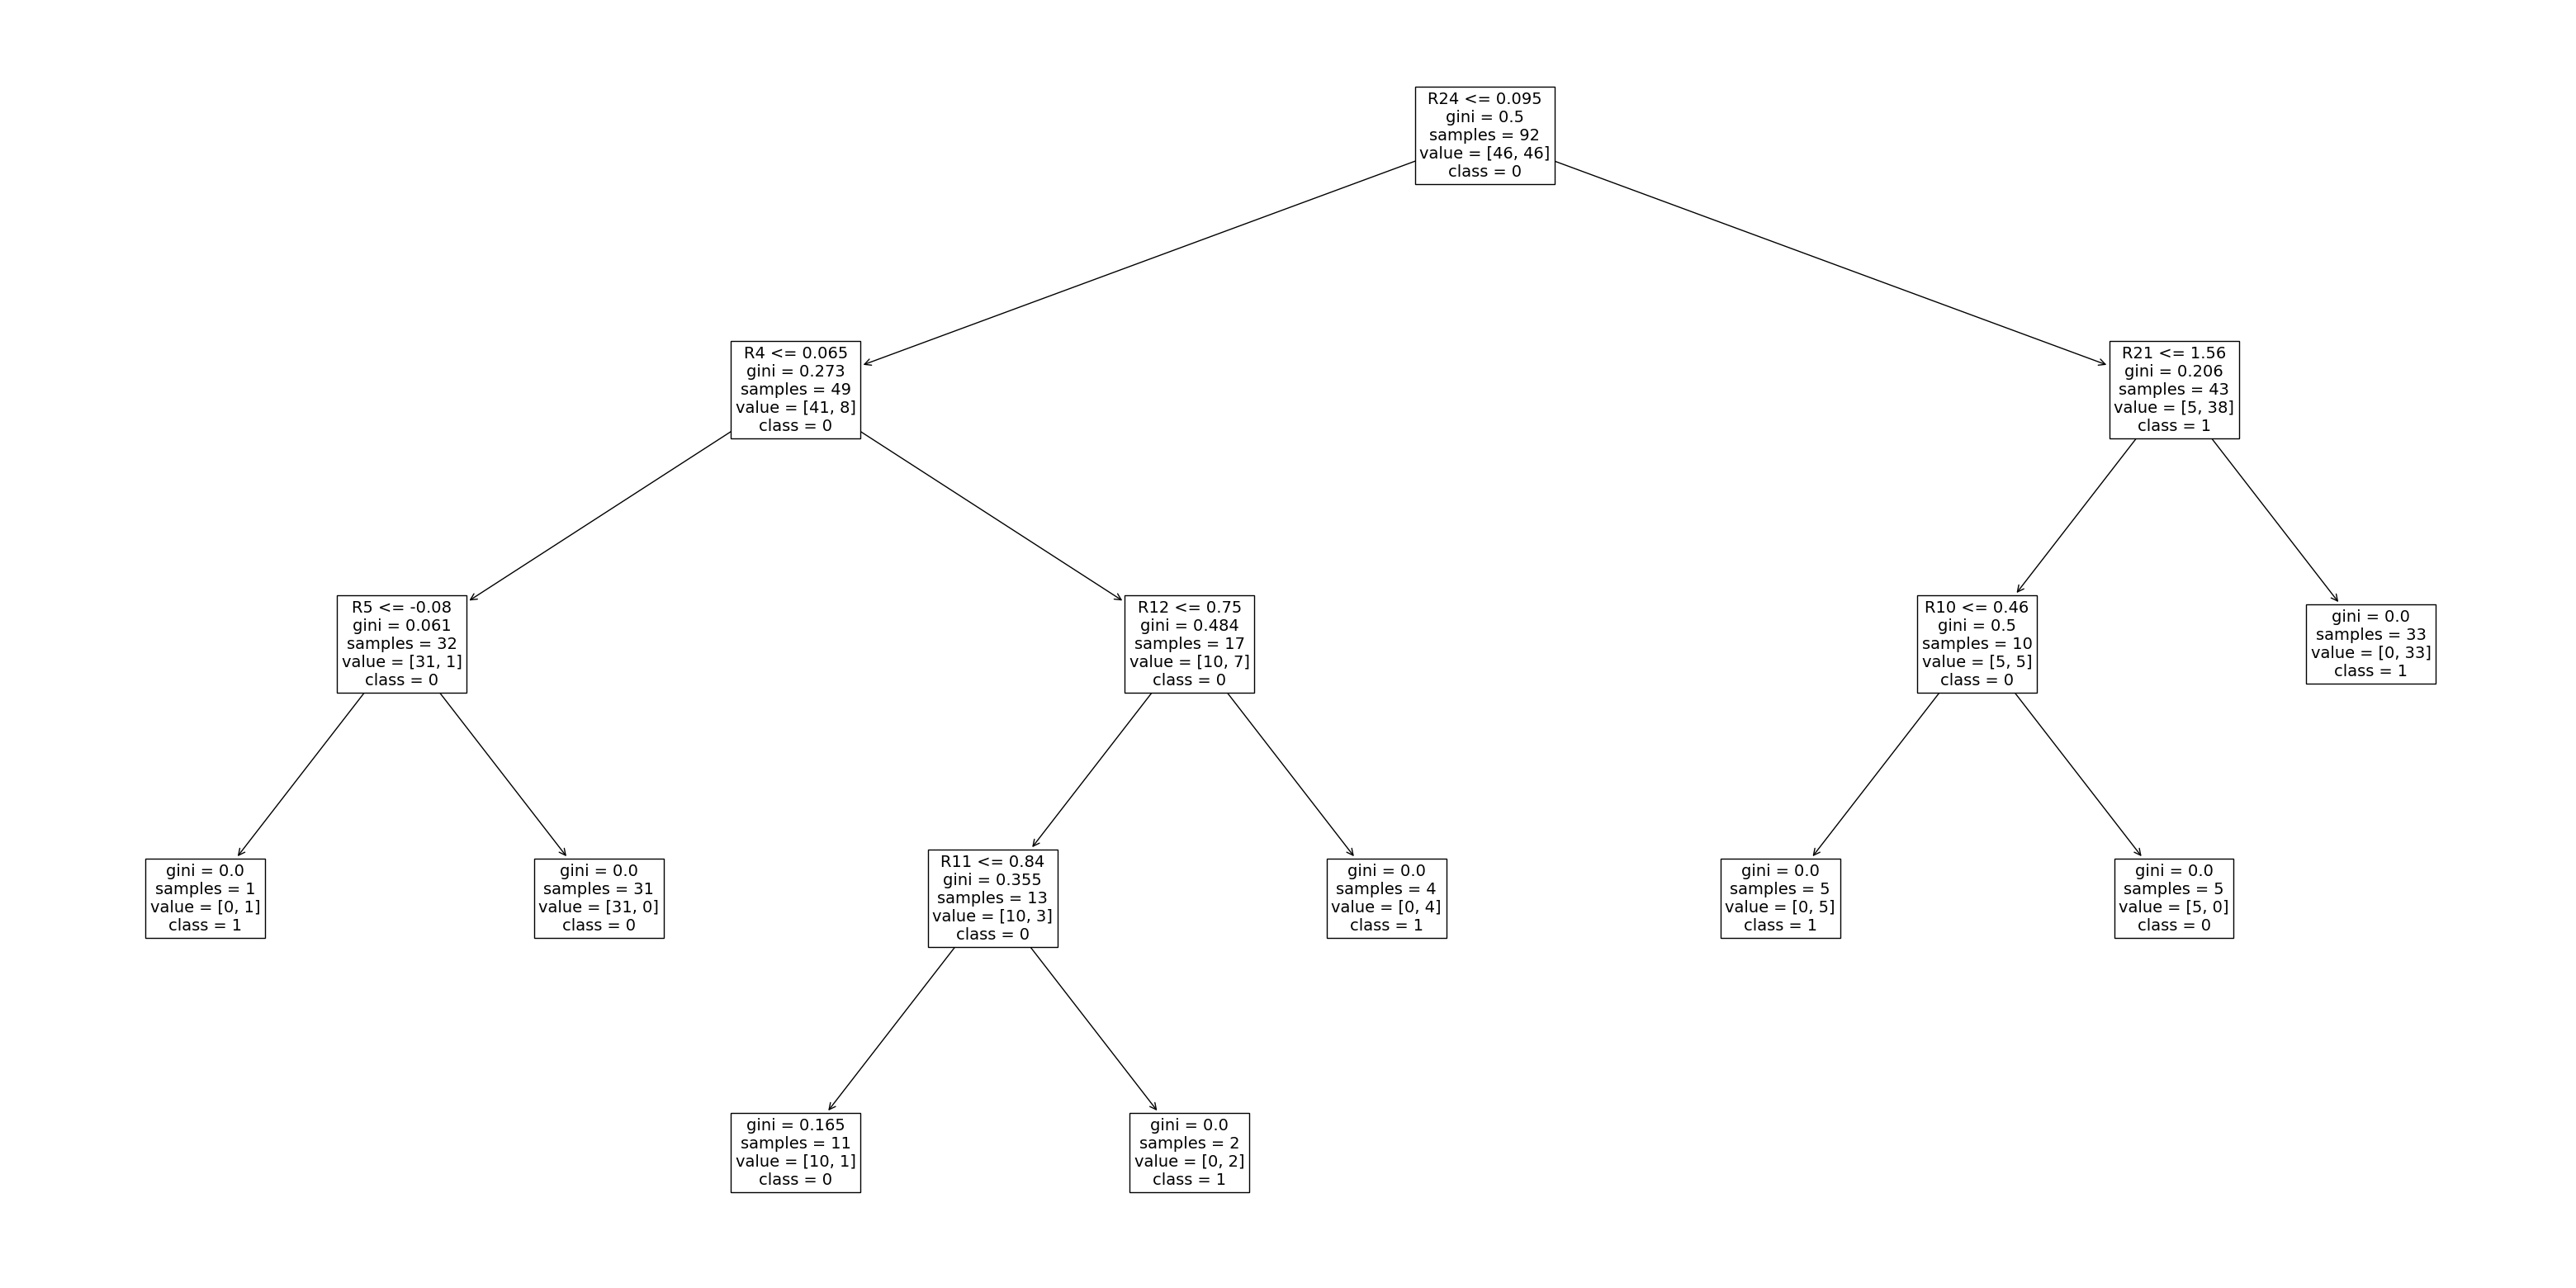

In [21]:
plt.figure(figsize=(40,20))
plot_tree(dtc, feature_names = x.columns, class_names=["0","1"], fontsize=14)
plt.show()

In [31]:
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

0.725
0.7175


In [32]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
dtc = DecisionTreeClassifier(random_state = 2022)
params = {"max_depth" : [2,3,4, None],
          "min_samples_split" : [1,5,10],
          "min_samples_split" : [1,5,10]}
gcv = GridSearchCV(dtc, param_grid = params, verbose = 3, scoring = "roc_auc", cv = kfold)
gcv.fit(x, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ..max_depth=2, min_samples_split=5;, score=0.808 total time=   0.0s
[CV 2/5] END ..max_depth=2, min_samples_split=5;, score=0.865 total time=   0.0s
[CV 3/5] END ..max_depth=2, min_samples_split=5;, score=0.751 total time=   0.0s
[CV 4/5] END ..max_depth=2, min_samples_split=5;, score=0.947 total time=   0.0s
[CV 5/5] END ..max_depth=2, min_samples_split=5;, score=0.917 total time=   0.0s
[CV 1/5] END .max_depth=2, min_samples_split=10;, score=0.808 total time=   0.0s
[CV 2/5] END .max_depth=2, min_samples_split=10;

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [2, 3, 4, None],
                         'min_samples_split': [1, 5, 10]},
             scoring='roc_auc', verbose=3)

In [33]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 2, 'min_samples_split': 5}
0.8576923076923075
